In [1]:
import pandas as pd
import numpy as np
import cvxopt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [2]:
# Code to Measure time taken by program to execute.
import time

# store starting time
begin = time.time()

In [3]:
df_total = pd.read_csv('df_total1.csv')
df_total

,Unnamed: 0,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,0,a786884,*brock,2019-01-03 04:19:00,2501 magin meadow dr in austin (tx),stray,normal,dog,2.000000,yes,...,male,yes,non-adopted,4.0,small,agreeable,family_dog,frequent,medium_high,hound_group
1,1,a706918,belle,2015-07-05 12:59:00,9409 bluegrass dr in austin (tx),stray,normal,dog,8.000000,no,...,female,yes,adopted,0.0,medium,pleaser,Not_define,medium,medium_low,sporting_group
2,2,a724273,runster,2016-04-14 06:43:00,2818 palomino trail in austin (tx),stray,normal,dog,0.916667,yes,...,male,yes,adopted,6.0,small,independent,apartment_friendly,rare,medium_high,hound_group
3,3,a665644,unknown,2013-10-21 07:59:00,austin (tx),stray,sick,cat,0.076660,yes,...,female,no,non-adopted,0.0,Unknown,Unknown,Not_define,Unknown,not_define,not_define
4,4,a682524,rio,2014-06-29 10:38:00,800 grove blvd in austin (tx),stray,normal,dog,4.000000,no,...,male,yes,adopted,2.0,large,pleaser,guard_dog,medium,high,working_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,110490,a830164,unknown,2021-03-03 02:17:00,travis (tx),owner surrender,normal,dog,0.083333,yes,...,unknown,unknown,non-adopted,0.0,small,agreeable,family_dog,rare,medium_low,toy_group
109117,110491,a829701,pee wee,2021-02-21 02:56:00,16201 biltmore avenue in travis (tx),stray,normal,dog,3.000000,no,...,male,no,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109118,110492,a765174,carson,2018-01-14 11:31:00,austin (tx),owner surrender,normal,dog,0.083333,yes,...,male,yes,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109119,110493,a829868,remy,2021-02-25 11:40:00,valdez in austin (tx),stray,normal,dog,1.000000,no,...,male,yes,adopted,5.0,small,agreeable,family_dog,frequent,medium_high,hound_group


# Standard Cleaning

In [4]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            109121 non-null  int64  
 1   Animal_ID             109121 non-null  object 
 2   Name                  109120 non-null  object 
 3   DateTime_Intake       109121 non-null  object 
 4   Found_Location        109121 non-null  object 
 5   Intake_type           109121 non-null  object 
 6   Intake_Condition      109121 non-null  object 
 7   Animal_Type           109121 non-null  object 
 8   Age_upon_Intake       109121 non-null  float64
 9   Mix_Breed             109121 non-null  object 
 10  Primary_Breed         109121 non-null  object 
 11  Secondary_Breed       109121 non-null  object 
 12  Main_Color            109121 non-null  object 
 13  Secondary_Color       109121 non-null  object 
 14  DateTime_Outcome      109121 non-null  object 
 15  

In [5]:
cols_num = ['Age_upon_Intake','Age_upon_Outcome','Days_in_shelter']
df_total[cols_num] = df_total[cols_num].astype(float)
cols_cat = ['Intake_type','Intake_Condition','Mix_Breed','Primary_Breed','Secondary_Breed','Main_Color','Secondary_Color','Sex','neuter/spay','Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','adopted/non-adopted','breed_group','Animal_Type']
df_total[cols_cat] = df_total[cols_cat].astype('category')
col2 = ['DateTime_Intake','DateTime_Outcome','Date of Birth']
df_total[col2] = df_total[col2].astype('datetime64[ns]')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            109121 non-null  int64         
 1   Animal_ID             109121 non-null  object        
 2   Name                  109120 non-null  object        
 3   DateTime_Intake       109121 non-null  datetime64[ns]
 4   Found_Location        109121 non-null  object        
 5   Intake_type           109121 non-null  category      
 6   Intake_Condition      109121 non-null  category      
 7   Animal_Type           109121 non-null  category      
 8   Age_upon_Intake       109121 non-null  float64       
 9   Mix_Breed             109121 non-null  category      
 10  Primary_Breed         109121 non-null  category      
 11  Secondary_Breed       109121 non-null  category      
 12  Main_Color            109121 non-null  category      
 13 

In [6]:
# csv created this
df_total = df_total.drop('Unnamed: 0',1)

# not conbine well with label coding

df_total = df_total.drop('Animal_ID',1) #@@@@@@@
df_total = df_total.drop('Name',1)
df_total = df_total.drop('Date of Birth',1)
df_total = df_total.drop('DateTime_Intake',1)
df_total = df_total.drop('DateTime_Outcome',1)
df_total = df_total.drop('Location',1)
df_total = df_total.drop('Found_Location',1)    #@@@@@@@@@
#df_total = df_total.drop('Age_upon_Intake_weeks',1)
#df_total = df_total.drop('Age_upon_Outcome_weeks',1)
#df_total = df_total.drop('Days in Shelter',1)

# change time to serial number to be able to put in model

C:\Users\diedr\AppData\Local\Temp\ipykernel_17268\1054605654.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Unnamed: 0',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_17268\1054605654.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Animal_ID',1) #@@@@@@@
C:\Users\diedr\AppData\Local\Temp\ipykernel_17268\1054605654.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Name',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_17268\1054605654.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Date of Birth',1)
C:\Users\diedr\AppData\Loca

In [7]:
df_total = df_total.drop('Outcome_Type', axis=1)
df_total = df_total.drop('Outcome_Subtype', axis=1)

# Label Encoder

y_test

y_train

X_train

len(y_test == 'unknown')

len(df_total['Outcome_Type'] == 'Unknown')

In [8]:
df_num = df_total.drop(cols_cat, axis=1)

In [9]:
df_cat = df_total.drop(cols_num, axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for i in df_cat.columns:
    df_cat[i] = labelencoder.fit_transform(df_cat[i])

df_total = df_cat.join(df_num)
df_total

,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,adopted/non-adopted,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group,Age_upon_Intake,Age_upon_Outcome,Days_in_shelter
0,4,5,2,1,35,126,55,37,1,2,1,3,1,2,1,2,1,2.000000,2.00,4.0
1,4,5,2,0,131,126,56,34,0,2,0,2,4,0,3,3,5,8.000000,8.00,0.0
2,4,5,2,1,32,126,46,51,1,2,0,3,3,1,4,2,1,0.916667,1.00,6.0
3,4,9,1,1,119,126,21,37,0,0,1,0,0,0,0,4,3,0.076660,0.08,0.0
4,4,5,2,0,116,16,51,29,1,2,0,1,4,3,3,0,9,4.000000,4.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,2,5,2,1,266,126,2,51,2,1,1,3,1,2,4,3,8,0.083333,0.08,0.0
109117,4,5,2,0,89,126,15,37,1,0,0,5,3,1,5,3,8,3.000000,3.00,0.0
109118,2,5,2,1,89,126,51,51,1,2,0,5,3,1,5,3,8,0.083333,0.17,0.0
109119,4,5,2,0,35,109,55,37,1,2,0,3,1,2,1,2,1,1.000000,1.00,5.0


# Cleaning target variable

In [11]:
df_total['adopted/non-adopted'].unique()

# unknown value is found in 21 rows

array([1, 0, 2])

In [12]:
index_names = df_total[df_total['adopted/non-adopted'] == 2 ].index
index_names

Int64Index([ 13869,  29677,  31621,  31898,  32860,  39609,  48814,  52620,
             54235,  57107,  72673,  74858,  75612,  79431,  90548,  93543,
             93795,  95675, 100101, 103241, 108841],
           dtype='int64')

In [13]:
df_total.drop(index_names, inplace=True)

In [14]:
df_total['adopted/non-adopted'].unique()

array([1, 0])

# spliting

In [15]:
X = df_total.drop('adopted/non-adopted', 1)
y = df_total['adopted/non-adopted']
X.head()

C:\Users\diedr\AppData\Local\Temp\ipykernel_17268\488732468.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_total.drop('adopted/non-adopted', 1)


,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group,Age_upon_Intake,Age_upon_Outcome,Days_in_shelter
0,4,5,2,1,35,126,55,37,1,2,3,1,2,1,2,1,2.000000,2.00,4.0
1,4,5,2,0,131,126,56,34,0,2,2,4,0,3,3,5,8.000000,8.00,0.0
2,4,5,2,1,32,126,46,51,1,2,3,3,1,4,2,1,0.916667,1.00,6.0
3,4,9,1,1,119,126,21,37,0,0,0,0,0,0,4,3,0.076660,0.08,0.0
4,4,5,2,0,116,16,51,29,1,2,1,4,3,3,0,9,4.000000,4.00,2.0


In [16]:
df_total['adopted'] = df_total['adopted/non-adopted']
df_total = df_total.drop(['adopted/non-adopted'], axis= 1) # same variable with differents layout

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [18]:
df_total

,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group,Age_upon_Intake,Age_upon_Outcome,Days_in_shelter,adopted
0,4,5,2,1,35,126,55,37,1,2,3,1,2,1,2,1,2.000000,2.00,4.0,1
1,4,5,2,0,131,126,56,34,0,2,2,4,0,3,3,5,8.000000,8.00,0.0,0
2,4,5,2,1,32,126,46,51,1,2,3,3,1,4,2,1,0.916667,1.00,6.0,0
3,4,9,1,1,119,126,21,37,0,0,0,0,0,0,4,3,0.076660,0.08,0.0,1
4,4,5,2,0,116,16,51,29,1,2,1,4,3,3,0,9,4.000000,4.00,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,2,5,2,1,266,126,2,51,2,1,3,1,2,4,3,8,0.083333,0.08,0.0,1
109117,4,5,2,0,89,126,15,37,1,0,5,3,1,5,3,8,3.000000,3.00,0.0,0
109118,2,5,2,1,89,126,51,51,1,2,5,3,1,5,3,8,0.083333,0.17,0.0,0
109119,4,5,2,0,35,109,55,37,1,2,3,1,2,1,2,1,1.000000,1.00,5.0,0


# Balancing

In [19]:
y_train

34189     1
99981     0
41166     1
45941     1
104237    0
         ..
16369     1
82075     1
7925      0
19702     0
44300     1
Name: adopted/non-adopted, Length: 76370, dtype: int32

In [20]:
y_train.value_counts()

0    45119
1    31251
Name: adopted/non-adopted, dtype: int64

In [21]:
y.value_counts()

0    64338
1    44762
Name: adopted/non-adopted, dtype: int64

In [22]:
from imblearn.datasets import make_imbalance

X_train, y_train = make_imbalance(X_train, y_train, sampling_strategy={0: 30000, 1: 30000},random_state=14)

# It was set to 30000 because of the non-adopted value:1 in y_train

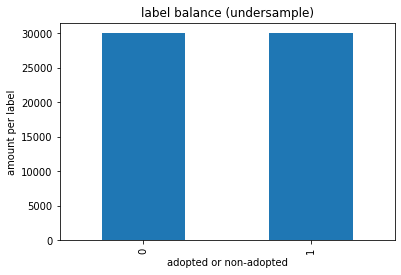

In [23]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance (undersample)')
plt.xlabel('adopted or non-adopted')
plt.ylabel('amount per label')
plt.show()

# SVM

In [24]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8074243813015582


In [26]:
 #Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7758303995101791
Recall: 0.7502775516246022


# K-fold Cross-validation

In [27]:
# evaluate KNN model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [28]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
#model = LogisticRegression()
model = svm.SVC(kernel='linear')
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.815 (0.006)


# Matrix

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm

array([[16290,  2929],
       [ 3374, 10137]], dtype=int64)

In [30]:
ac

0.8074243813015582

# Classification Report

In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     19219
           1       0.78      0.75      0.76     13511

    accuracy                           0.81     32730
   macro avg       0.80      0.80      0.80     32730
weighted avg       0.81      0.81      0.81     32730



# Log loss

In [32]:
# Cross Validation Classification LogLoss
import pandas
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = svm.SVC(kernel='linear')
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\metrics\_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "D:\Data Analysis and Scienc

Logloss: nan (nan)


D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\metrics\_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "D:\Data Analysis and Scienc

In [33]:
# program body ends

# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 8369.131312131882
